In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [24]:
df.shape

(20491, 2)

In [25]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [26]:
df.loc[0, 'Review']

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [2]:
df['Rating'].value_counts(normalize=True)

5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: Rating, dtype: float64

In [3]:
df['Hotel_Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Neutral' if x == 3 else 'Negative')
df.head()

,Review,Rating,Hotel_Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive


In [4]:
df['Hotel_Sentiment'].value_counts(normalize=True)

Positive    0.736567
Negative    0.156849
Neutral     0.106583
Name: Hotel_Sentiment, dtype: float64

<Axes: xlabel='Hotel_Sentiment', ylabel='count'>

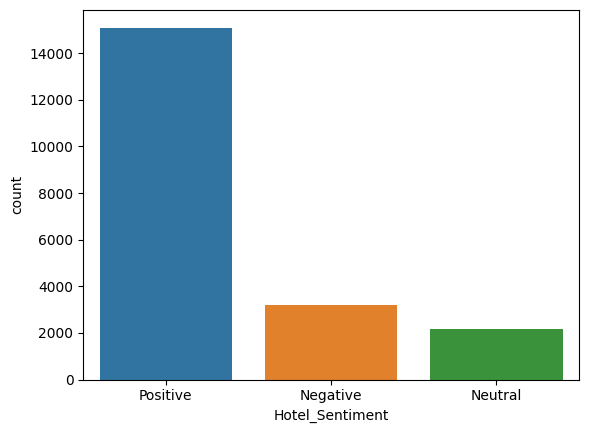

In [5]:
sns.countplot(x='Hotel_Sentiment', data=df)

In [15]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['Review']))

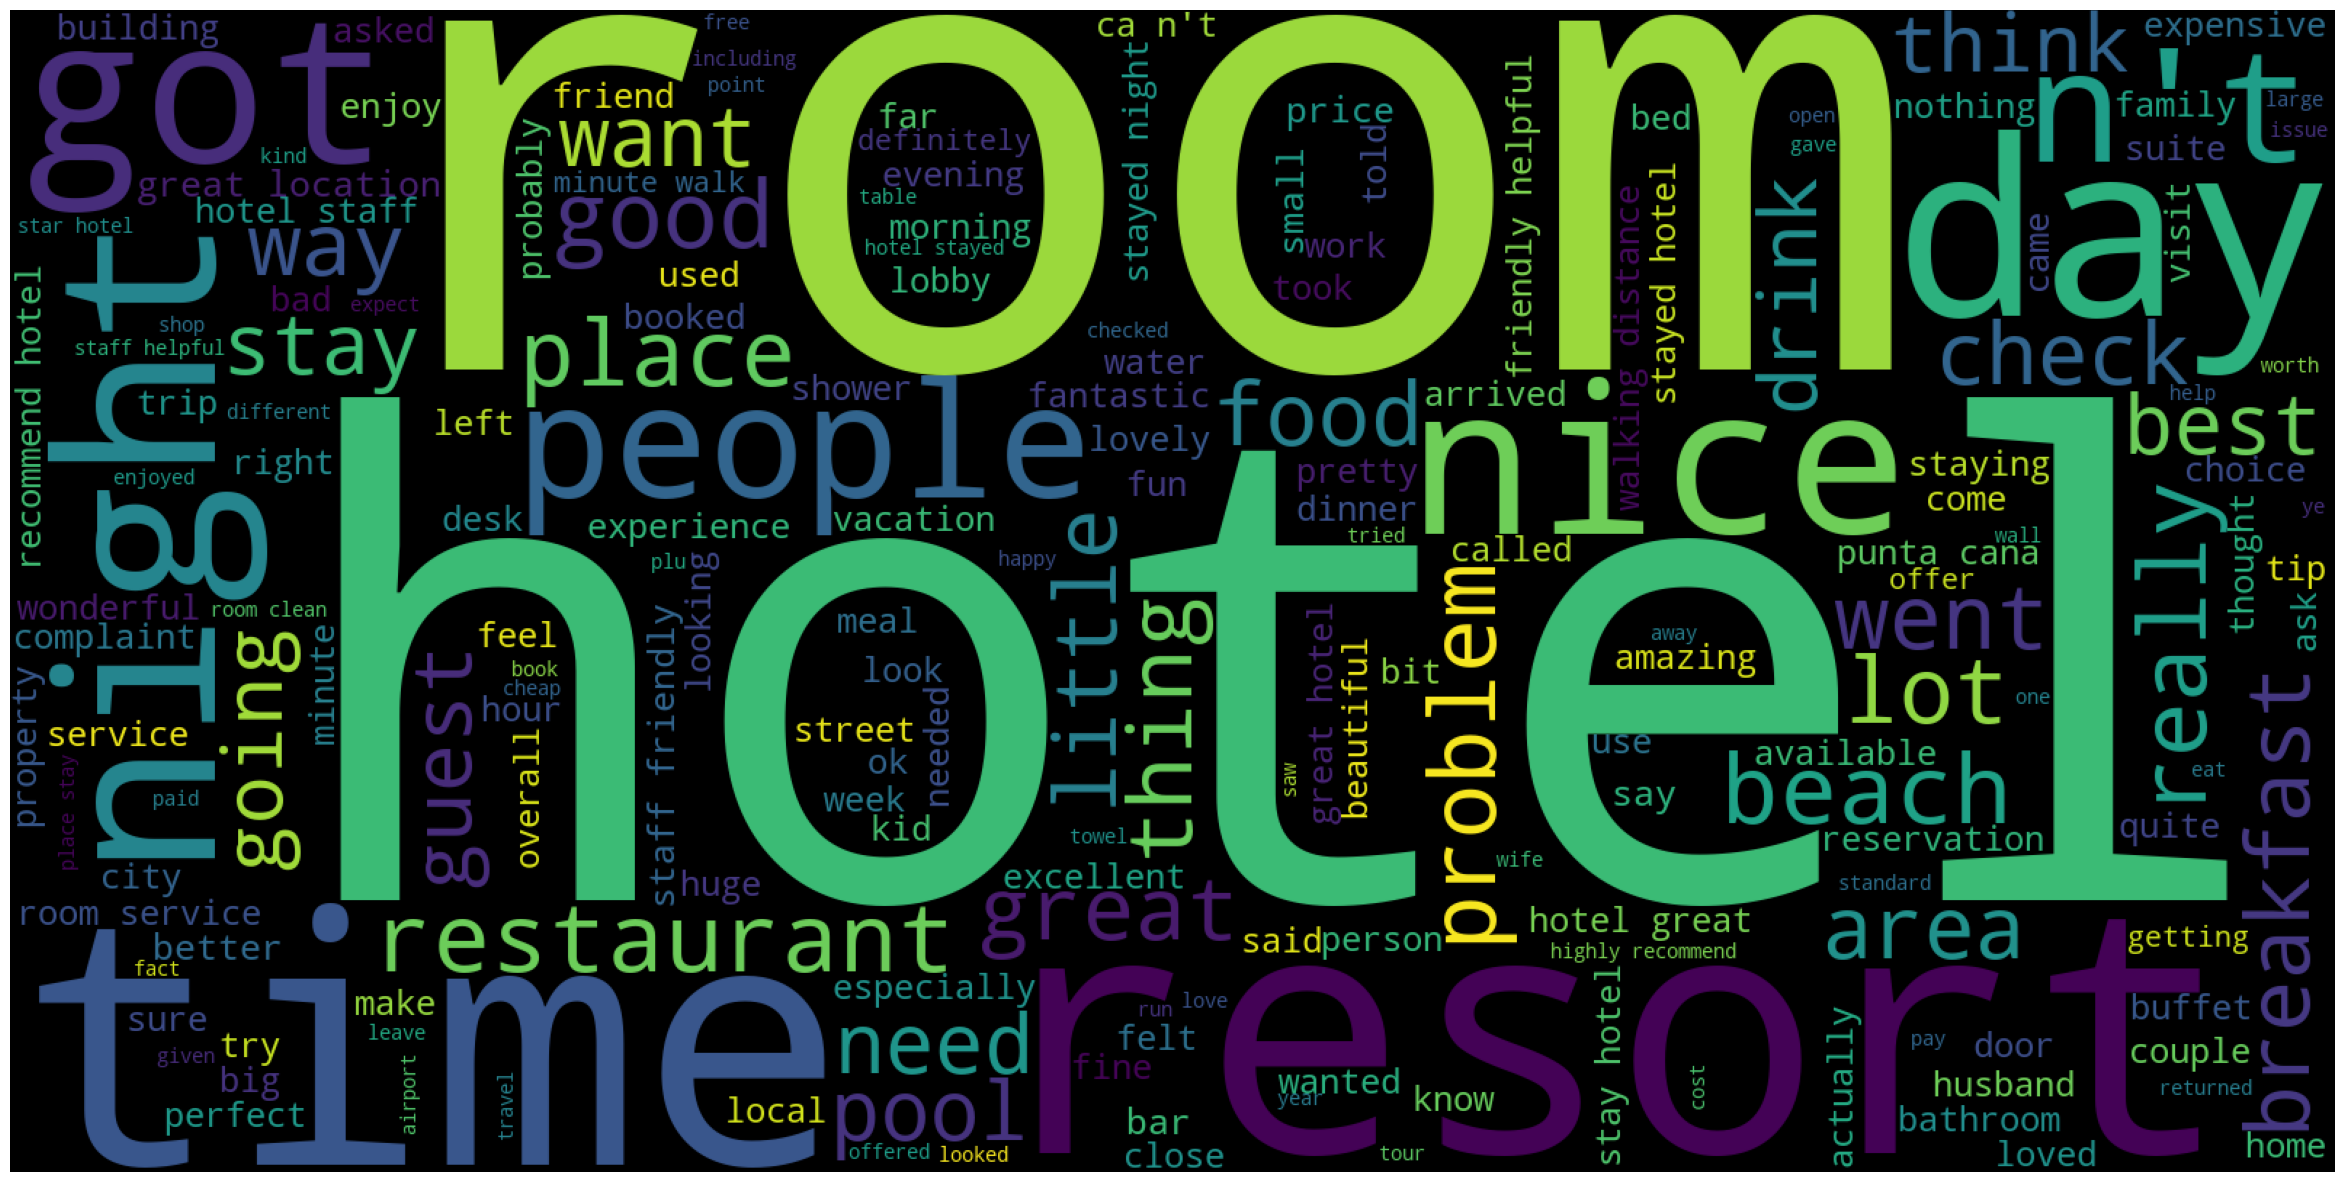

In [17]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [6]:
df['Sentiment']=df['Hotel_Sentiment'].apply(lambda x: 1 if x=='Positive' else 0)

df.head()

,Review,Rating,Hotel_Sentiment,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive,1
1,ok nothing special charge diamond member hilto...,2,Negative,0
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,0
3,"unique, great stay, wonderful time hotel monac...",5,Positive,1
4,"great stay great stay, went seahawk game aweso...",5,Positive,1


In [7]:
df['Sentiment'].value_counts()

1    15093
0     5398
Name: Sentiment, dtype: int64

### Step 1 - Identify the Input and Output

In [8]:
X = df.Review
y = df.Sentiment 
print(X.shape, y.shape)

(20491,) (20491,)


### Step 2 - Split the Data into Train and Test

In [9]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15368,) (15368,)
(5123,) (5123,)


### Step 3 - Data preprocessing on train data(X_train)

In [10]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [11]:
def clean(doc):
    # Remove puntuation and numbers.
    doc = "".join([char for char in doc if char not in string.puntuation and not char.isdigit()])
    
    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)
    
    # stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in stemmed_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Define your preprocessing function
def clean(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Apply other cleaning steps as needed
    # For example, removing numbers, stopwords, etc.
    # Replace '...' with your cleaning steps
    cleaned_text = text
    return cleaned_text

# Assuming you have defined X_train before this point
# X_train should be a list-like object containing your training text data

# Instantiate a CountVectorizer with your custom preprocessor
vect = CountVectorizer(preprocessor=clean)

# Use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 1.47 s
Wall time: 1.79 s
(15368, 67552)


### Step 4: Data Preprocessing on test data (X_test)

In [13]:
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(5123, 67552)


### Step 5: Building a Model (i.e Train the classifier)

In [14]:

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model

CPU times: total: 15.6 ms
Wall time: 14 ms


MultinomialNB()

### Step 6: Evaluate on train data

In [15]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9290083289953149

### Step 7: Evaluate on test data

In [16]:
# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.8854186999804802

In [17]:
import warnings

warnings.filterwarnings('ignore')

In [18]:
import joblib
from joblib import Memory

import os

In [19]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [20]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 22s
Wall time: 1min 41s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=2000,
                                 preprocessor=<function clean at 0x000001A7D6CDB920>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9119198312236286


In [21]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 19s
Wall time: 1min 43s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=2000,
                                 preprocessor=<function clean at 0x000001A7D6CDB920>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9119198312236286


In [22]:
import os
import joblib

# Ensure the directory exists
os.makedirs('best_models', exist_ok=True)

# Get the best model from GridSearchCV
best_model = clf.best_estimator_

# Serialize and save the best model
joblib.dump(best_model, 'best_models/demo_model_nb.pkl')

['best_models/demo_model_nb.pkl']

In [23]:
# Deserialization

model = joblib.load('best_models/demo_model_nb.pkl')

new_data = ['Good','Bad']

prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1 1]


In [24]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test)

print("Accuracy Score:", metrics.accuracy_score(y_test, y_test_pred))

CPU times: total: 406 ms
Wall time: 601 ms
Accuracy Score: 0.8696076517665431


In [25]:
%time X_train_clean = [clean(doc) for doc in X_train]

CPU times: total: 125 ms
Wall time: 268 ms


In [26]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 46.9 ms
Wall time: 106 ms


In [27]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 2s
Wall time: 1min 30s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9119198312236286


In [28]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 1min 9s
Wall time: 1min 24s
Score on Test Data:  0.918460534898891
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 12min 11s
Wall time: 14min 44s
Score on Test Data:  0.8791208791208792
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 50min 42s
Wall time: 1h 6min 4s
Score on Test Data:  0.9159310063832677


In [29]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=10))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier(max_depth=5))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.5,
                                    penalty='elasticnet', solver='saga'))])



In [30]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 391 ms
Wall time: 515 ms
Test Score (F1) 0.918460534898891
Model Size: 1036822 Bytes
********** decision_tree **********
CPU times: total: 359 ms
Wall time: 465 ms
Test Score (F1) 0.8791208791208792
Model Size: 828492 Bytes
********** logistic_regression **********
CPU times: total: 344 ms
Wall time: 480 ms
Test Score (F1) 0.9159310063832677
Model Size: 916889 Bytes
